In [3]:
import logging
rl = logging.getLogger()
rl.setLevel(logging.INFO)

In [4]:
import radial
import angular
import nearby_root_finder

In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('text', usetex = True)

# Exploring values of inversion error function

In [3]:
radial.Leaver_Cf_trunc_inversion(0.4-0.2j, 0., -2, 2, 4.+0.j, 0, 300, 1.+0.j)

(-3.7832264403820357-1.8368923380529323j)

In [4]:
Npts=100
omegar=np.arange(0.2, .5, .3/Npts)
omegai=np.arange(-0.2, -0., .2/Npts)
Or, Oi = np.meshgrid(omegar, omegai)
Os = Or + 1.j*Oi

In [5]:
leav1 = lambda omega: radial.Leaver_Cf_trunc_inversion(omega, 0., -2, 2, 4.+0.j, 0, 300, 0.j)
leavf = np.vectorize(leav1)
Leavers = leavf(Os)

In [16]:
def leav1(omega): 
    inv_err, cf_err, its = radial.Leaver_Cf_inv_Lentz(omega, 0., -2, 2, 4.+0.j, 0)
    # logging.info("Lentz terminated with cf_err={}, its={}".format(cf_err, its))
    return inv_err
leavf = np.vectorize(leav1)
Leavers = leavf(Os)

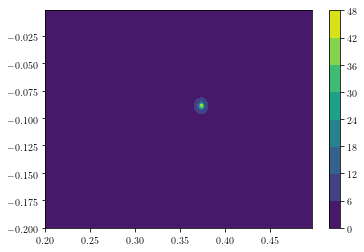

In [8]:
CS = plt.contourf(Or, Oi, 1/np.abs(Leavers))
plt.colorbar(CS)
plt.show()

In [9]:
angular.sep_const_closest(4., -2, 0.1, 2, 20)

(3.7259203780062347+0j)

In [10]:
Npts=120
orrange=[0., .4]
oirange=[-2.3,-0.75]
omegar=np.arange(orrange[0], orrange[1], (orrange[1]-orrange[0])/Npts)
omegai=np.arange(oirange[0], oirange[1], (oirange[1]-oirange[0])/Npts)
Or, Oi = np.meshgrid(omegar, omegai)
Os = Or + 1.j*Oi

In [14]:
a = 0.0
s = -2
m = 2
l = 2

n_inv = 6
Nr = 300
r_N = 0.
l_max = 20

def leav1(omega):
    inv_err, _, _ = radial.Leaver_Cf_inv_Lentz(omega, a, s, m,
                                               angular.sep_const_closest(angular.SWSphericalH_A(s,l,m),
                                                                                 s, a*omega, m, l_max),
                                               n_inv, N_max=400)
    return inv_err

leavf = np.vectorize(leav1)
Leavers = leavf(Os)

In [23]:
leav1(-2.j+1.e-30)

(2.5757174171303632e-14+5.519868356850301e-29j)

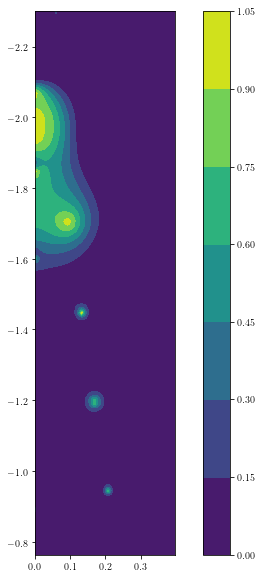

In [24]:
plt.figure(figsize=(10,10))
CS = plt.contourf(Or, Oi, np.exp(-np.abs(Leavers)))
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal')
plt.colorbar(CS)
plt.savefig("test.png", bbox_inches="tight", dpi=300)
plt.show()

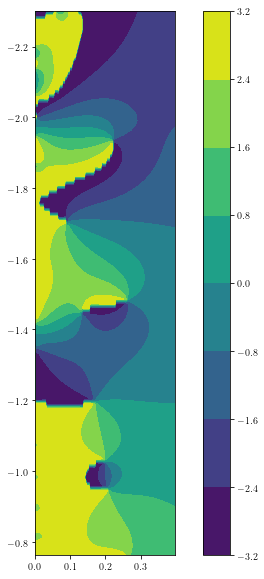

In [16]:
plt.figure(figsize=(10,10))
CS = plt.contourf(Or, Oi, np.angle(Leavers))
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal')
plt.colorbar(CS)
plt.show()

In [12]:
from scipy import optimize

In [13]:
a = 0.5
s = -2
m = 2

n_inv = 3
Nr = 300
r_N = 0.
l_max = 20

A0 = 4.
omega_guess = 1.-1.j

def leavA(x):
    omega = x[0] + 1.j*x[1]
    A = angular.sep_const_closest(A0, s, a*omega, m, l_max)
    Leav_err = radial.Leaver_Cf_trunc_inversion(omega, a, s, m, A, n_inv, Nr, r_N)
    return [np.real(Leav_err), np.imag(Leav_err)]

sol = optimize.root(leavA, [np.real(omega_guess), np.imag(omega_guess)], tol=1e-10)
print(sol)
omega_sol = sol.x[0] + 1.j*sol.x[1]
print(omega_sol)

    fjac: array([[-0.57359808, -0.81913689],
       [ 0.81913689, -0.57359808]])
     fun: array([-1.33226763e-14, -2.08721929e-14])
 message: 'The solution converged.'
    nfev: 19
     qtf: array([-1.81513595e-12, -8.49256196e-13])
       r: array([-37.83289639, -11.46901807,  -6.65014296])
  status: 1
 success: True
       x: array([ 0.34774125, -0.83259476])
(0.3477412539359394-0.8325947550362678j)


In [14]:
angular.sep_consts(s, a*omega_sol, m, l_max)

array([  3.64660074+1.21471602j,   9.82630392+0.6137243j ,
        17.91099677+0.38582177j,  27.95981518+0.27679539j,
        39.98983299+0.21636142j,  54.00938032+0.17936711j,
        70.0227435 +0.15505889j,  88.0322533 +0.13821883j,
       108.03924895+0.12606481j, 130.04453913+0.11700177j,
       154.04863361+0.11006122j, 180.05186591+0.10462704j,
       208.05446134+0.10029188j, 238.05657636+0.09677759j,
       270.05832233+0.0938889j , 304.05978018+0.09148542j,
       340.06100989+0.08946407j, 418.04949541+0.07276048j,
       378.06205594+0.08780761j])

In [15]:
angular.sep_consts(s, 0., 2, 20)

array([  4.+0.j,  10.+0.j,  18.+0.j,  28.+0.j,  40.+0.j,  54.+0.j,
        70.+0.j,  88.+0.j, 108.+0.j, 130.+0.j, 154.+0.j, 180.+0.j,
       208.+0.j, 238.+0.j, 270.+0.j, 304.+0.j, 340.+0.j, 378.+0.j,
       418.+0.j])

# Testing the nearby_root_finder class

In [4]:
from nearby_root_finder import nearby_root_finder

In [5]:
tol = 1e-10
a = 0.5
s = -2
m = 2

n_inv = 3
Nr = 300
r_N = 0.
l_max = 20

A0 = 4.
omega_guess = 1.-1.j

In [6]:
finder = nearby_root_finder(a=a, s=s, m=m, A_closest_to=A0,
                            l_max=l_max, omega_guess=omega_guess,
                            tol=tol, n_inv=n_inv, Nr=Nr, r_N=r_N)

In [7]:
finder.do_solve()

(0.34774125399689443-0.8325947549910427j)

In [9]:
finder.set_params(a=0.1)
finder.set_params(Nr=300)
o1 = finder.do_solve()
finder.set_params(Nr=301)
o2 = finder.do_solve()
print(o1)
print(o1-o2)
print(np.abs(o1-o2))

(-0.18951803565247327-0.9634120162791132j)
0j
0.0


In [10]:
finder.set_params(a=0.3)
finder.set_params(l_max=20)
o1 = finder.do_solve()
finder.set_params(l_max=21)
o2 = finder.do_solve()
print(o1)
print(o1-o2)
print(np.abs(o1-o2))

(0.2464572165794458-1.1069149779629603j)
(1.970645868709653e-15+4.440892098500626e-15j)
4.858494393367941e-15


# Testing the Kerr_a_seq_finder class

In [1]:
from Kerr_a_seq_finder import Kerr_a_seq_finder

In [8]:
a_max = .998
tol=1e-10

ns=np.arange(0,8)
s=-2
ls=np.arange(2,3)
m=0
seqs = {}
for n in ns:
    for l in ls:
        seqs[(l,n)] = Kerr_a_seq_finder(n=n, a_max=a_max, delta_a=3e-3, s=s, l=l, m=m)
        seqs[(l,n)].do_find_sequence()

INFO:root:n=0, l=2, started from guess omega=(0.373671684418-0.0889623156889j), found omega=(0.373671684418-0.0889623156889j)
INFO:root:n=1, l=2, started from guess omega=(0.346710996879-0.273914875291j), found omega=(0.346710996879-0.273914875291j)
INFO:root:n=2, l=2, started from guess omega=(0.301053454613-0.478276983221j), found omega=(0.301053454613-0.478276983223j)
INFO:root:n=3, l=2, started from guess omega=(0.251504962226-0.705148202442j), found omega=(0.251504962226-0.705148202442j)
INFO:root:n=4, l=2, started from guess omega=(0.20751457983-0.946844890905j), found omega=(0.207514579829-0.946844890907j)
INFO:root:n=5, l=2, started from guess omega=(0.16929940307-1.19560805409j), found omega=(0.16929940307-1.19560805409j)
INFO:root:n=6, l=2, started from guess omega=(0.133252340199-1.44791062621j), found omega=(0.133252340199-1.44791062621j)
INFO:root:n=7, l=2, started from guess omega=(0.0928223337522-1.70384117213j), found omega=(0.0928223524393-1.70384117686j)


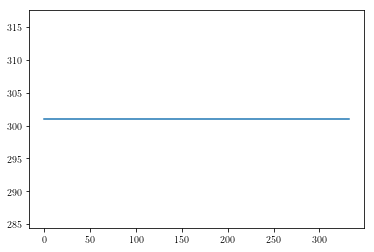

In [65]:
plt.plot(1.e-17+np.array(seqs[(2,7)].iters))
plt.show()

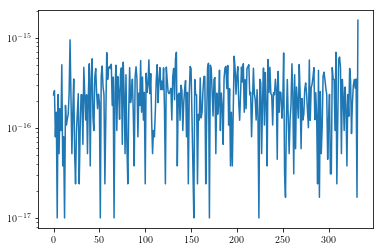

In [78]:
plt.plot(1.e-17+np.array(seqs[(4,0)].cf_err))
plt.gca().set_yscale('log')
plt.show()

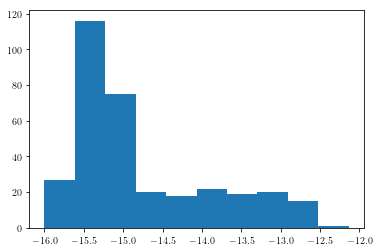

In [79]:
plt.hist(np.log10(1.e-16 + np.array(seqs[(2,2)].cf_err)))
plt.show()

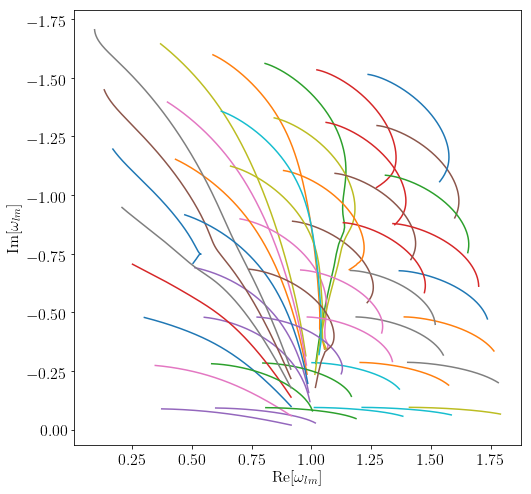

In [80]:
plt.figure(figsize=(8,8))

for (l,n), seq in seqs.iteritems():
    plt.plot(np.real(seq.omega), np.imag(seq.omega))
#plt.xlim(-1.5, 1.5)
#plt.ylim(-1.7,0.)

plt.gca().invert_yaxis()
plt.gca().tick_params(labelsize=16)
plt.xlabel(r'$\textrm{Re}[\omega_{lm}]$', fontsize=16)
plt.ylabel(r'$\textrm{Im}[\omega_{lm}]$', fontsize=16)
plt.savefig("test.png", bbox_inches="tight", dpi=300)
plt.show()

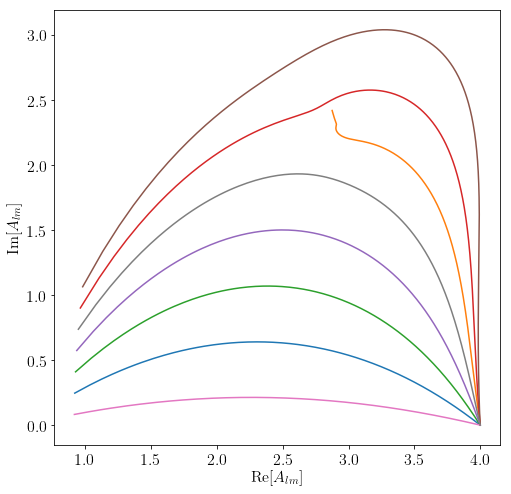

In [84]:
plt.figure(figsize=(8,8))

for (l,n), seq in seqs.iteritems():
    if (l==2):
        plt.plot(np.real(seq.A), np.imag(seq.A))

plt.gca().tick_params(labelsize=16)
plt.xlabel(r'$\textrm{Re}[A_{lm}]$', fontsize=16)
plt.ylabel(r'$\textrm{Im}[A_{lm}]$', fontsize=16)
# plt.savefig("test.png", bbox_inches="tight", dpi=300)

plt.show()

# Testing the build_Schw_dict function and auto-generating dict in module

In [32]:
import Schw_table

In [33]:
reload(Schw_table)

<module 'Schw_table' from 'Schw_table.py'>

Note to self. Need to actually use N_max. Inspect what's going on with the # iters below to come up with reasonable values for N_max. Get those iters by modifying build_Schw_dict. Actually change the value of Nr_max in nearby_root_finder instead of using np.Inf

In [15]:
n_max = 20
l_max = 20
s_arr = [-2, -1, 0]

tol = 1e-10

Schw_dict = Schw_table.build_Schw_dict(s_arr=s_arr, n_max=n_max, l_max=l_max, tol=tol)


In [34]:
from Schw_table import Schw_QNM_dict

In [19]:
# my_dict = Schw_dict

In [35]:
my_dict = Schw_QNM_dict().load_dict()

INFO:root:Could not load Schw QNM dict from file, computing
INFO:root:s=-2, l=2, found what I think is n=0, omega=(0.373671684418-0.0889623156889j)
INFO:root:s=-2, l=2, found what I think is n=1, omega=(0.346710996879-0.273914875291j)
INFO:root:s=-2, l=2, found what I think is n=2, omega=(0.301053454613-0.478276983221j)
INFO:root:s=-2, l=2, found what I think is n=3, omega=(0.251504962226-0.705148202442j)
INFO:root:s=-2, l=2, found what I think is n=4, omega=(0.20751457983-0.946844890905j)
INFO:root:s=-2, l=2, found what I think is n=5, omega=(0.16929940307-1.19560805409j)
INFO:root:s=-2, l=2, found what I think is n=6, omega=(0.133252340199-1.44791062621j)
INFO:root:s=-2, l=2, found what I think is n=7, omega=(0.0928223337522-1.70384117213j)
INFO:root:s=-2, l=2, found what I think is n=8, omega=(3.87065984787e-10-2.01352055809j)
INFO:root:s=-2, l=2, found what I think is n=9, omega=(0.0632633575949-2.30264463398j)
INFO:root:s=-2, l=2, found what I think is n=10, omega=(0.0825981429254

INFO:root:s=-2, l=6, found what I think is n=14, omega=(0.800125127458-3.22824388626j)
INFO:root:s=-2, l=6, found what I think is n=15, omega=(0.777575567798-3.47910212568j)
INFO:root:s=-2, l=6, found what I think is n=16, omega=(0.756900000575-3.73068525606j)
INFO:root:s=-2, l=6, found what I think is n=17, omega=(0.737891185462-3.98277586325j)
INFO:root:s=-2, l=6, found what I think is n=18, omega=(0.720360733649-4.23521495274j)
INFO:root:s=-2, l=6, found what I think is n=19, omega=(0.704141213978-4.48788644527j)
INFO:root:s=-2, l=7, found what I think is n=0, omega=(1.40973512061-0.0955096292751j)
INFO:root:s=-2, l=7, found what I think is n=1, omega=(1.40247093803-0.287164065494j)
INFO:root:s=-2, l=7, found what I think is n=2, omega=(1.38818184551-0.480709209171j)
INFO:root:s=-2, l=7, found what I think is n=3, omega=(1.36735592562-0.67734906531j)
INFO:root:s=-2, l=7, found what I think is n=4, omega=(1.34073939548-0.878180857684j)
INFO:root:s=-2, l=7, found what I think is n=5, 

INFO:root:s=-2, l=11, found what I think is n=10, omega=(1.96666537277-2.10938683988j)
INFO:root:s=-2, l=11, found what I think is n=11, omega=(1.92960278572-2.32855997902j)
INFO:root:s=-2, l=11, found what I think is n=12, omega=(1.89188671722-2.55157799848j)
INFO:root:s=-2, l=11, found what I think is n=13, omega=(1.85401077371-2.77829824124j)
INFO:root:s=-2, l=11, found what I think is n=14, omega=(1.81640975894-3.00850398141j)
INFO:root:s=-2, l=11, found what I think is n=15, omega=(1.77944779392-3.241924224j)
INFO:root:s=-2, l=11, found what I think is n=16, omega=(1.74341353489-3.47825470232j)
INFO:root:s=-2, l=11, found what I think is n=17, omega=(1.70852180021-3.717177433j)
INFO:root:s=-2, l=11, found what I think is n=18, omega=(1.67492003306-3.958376995j)
INFO:root:s=-2, l=11, found what I think is n=19, omega=(1.64269770284-4.20155267384j)
INFO:root:s=-2, l=12, found what I think is n=0, omega=(2.38554138079-0.0959710349513j)
INFO:root:s=-2, l=12, found what I think is n=1,

INFO:root:s=-2, l=16, found what I think is n=5, omega=(3.11221493248-1.06391145504j)
INFO:root:s=-2, l=16, found what I think is n=6, omega=(3.09347799631-1.26063685319j)
INFO:root:s=-2, l=16, found what I think is n=7, omega=(3.07196054321-1.45897045203j)
INFO:root:s=-2, l=16, found what I think is n=8, omega=(3.04782307566-1.65912907419j)
INFO:root:s=-2, l=16, found what I think is n=9, omega=(3.02124928226-1.86131341167j)
INFO:root:s=-2, l=16, found what I think is n=10, omega=(2.99244481276-2.06570440303j)
INFO:root:s=-2, l=16, found what I think is n=11, omega=(2.9616352224-2.27245953263j)
INFO:root:s=-2, l=16, found what I think is n=12, omega=(2.92906299785-2.48170929694j)
INFO:root:s=-2, l=16, found what I think is n=13, omega=(2.89498366021-2.69355412331j)
INFO:root:s=-2, l=16, found what I think is n=14, omega=(2.85966104153-2.90806203676j)
INFO:root:s=-2, l=16, found what I think is n=15, omega=(2.82336193762-3.12526733916j)
INFO:root:s=-2, l=16, found what I think is n=16,

INFO:root:s=-1, l=2, found what I think is n=0, omega=(0.45759551163-0.0950044258195j)
INFO:root:s=-1, l=2, found what I think is n=1, omega=(0.436542385751-0.29071014312j)
INFO:root:s=-1, l=2, found what I think is n=2, omega=(0.401186733916-0.501587346343j)
INFO:root:s=-1, l=2, found what I think is n=3, omega=(0.362595032332-0.730198514286j)
INFO:root:s=-1, l=2, found what I think is n=4, omega=(0.328736671137-0.971609378934j)
INFO:root:s=-1, l=2, found what I think is n=5, omega=(0.3014929957-1.21971524975j)
INFO:root:s=-1, l=2, found what I think is n=6, omega=(0.279844916748-1.47079320168j)
INFO:root:s=-1, l=2, found what I think is n=7, omega=(0.262379087713-1.72307157216j)
INFO:root:s=-1, l=2, found what I think is n=8, omega=(0.247978763566-1.97576344716j)
INFO:root:s=-1, l=2, found what I think is n=9, omega=(0.235855297638-2.22852324715j)
INFO:root:s=-1, l=2, found what I think is n=10, omega=(0.225460818293-2.48120132574j)
INFO:root:s=-1, l=2, found what I think is n=11, om

INFO:root:s=-1, l=6, found what I think is n=15, omega=(0.816736852824-3.48927172036j)
INFO:root:s=-1, l=6, found what I think is n=16, omega=(0.796347638695-3.74105672673j)
INFO:root:s=-1, l=6, found what I think is n=17, omega=(0.777610383522-3.9933605813j)
INFO:root:s=-1, l=6, found what I think is n=18, omega=(0.760341367071-4.24602173819j)
INFO:root:s=-1, l=6, found what I think is n=19, omega=(0.744376335526-4.49892172863j)
INFO:root:s=-1, l=7, found what I think is n=0, omega=(1.43564094176-0.0960946736473j)
INFO:root:s=-1, l=7, found what I think is n=1, omega=(1.42852398071-0.288905931367j)
INFO:root:s=-1, l=7, found what I think is n=2, omega=(1.41452583516-0.483567479257j)
INFO:root:s=-1, l=7, found what I think is n=3, omega=(1.39412605321-0.681254900553j)
INFO:root:s=-1, l=7, found what I think is n=4, omega=(1.36805482803-0.883036705743j)
INFO:root:s=-1, l=7, found what I think is n=5, omega=(1.3372823987-1.08980064795j)
INFO:root:s=-1, l=7, found what I think is n=6, ome

INFO:root:s=-1, l=11, found what I think is n=11, omega=(1.94862847877-2.33299984056j)
INFO:root:s=-1, l=11, found what I think is n=12, omega=(1.91120574905-2.55619741886j)
INFO:root:s=-1, l=11, found what I think is n=13, omega=(1.87361177998-2.78306394242j)
INFO:root:s=-1, l=11, found what I think is n=14, omega=(1.83627694951-3.01338748836j)
INFO:root:s=-1, l=11, found what I think is n=15, omega=(1.7995624909-3.2469023841j)
INFO:root:s=-1, l=11, found what I think is n=16, omega=(1.76375565977-3.48330969753j)
INFO:root:s=-1, l=11, found what I think is n=17, omega=(1.72907115062-3.72229638686j)
INFO:root:s=-1, l=11, found what I think is n=18, omega=(1.69565725766-3.96355131626j)
INFO:root:s=-1, l=11, found what I think is n=19, omega=(1.66360495587-4.20677727814j)
INFO:root:s=-1, l=12, found what I think is n=0, omega=(2.40099027245-0.0961782445327j)
INFO:root:s=-1, l=12, found what I think is n=1, omega=(2.39671591763-0.28875827023j)
INFO:root:s=-1, l=12, found what I think is n

INFO:root:s=-1, l=16, found what I think is n=6, omega=(3.10544437695-1.26212541607j)
INFO:root:s=-1, l=16, found what I think is n=7, omega=(3.08401757492-1.46066795007j)
INFO:root:s=-1, l=16, found what I think is n=8, omega=(3.05998186521-1.6610267771j)
INFO:root:s=-1, l=16, found what I think is n=9, omega=(3.03352002178-1.86340144173j)
INFO:root:s=-1, l=16, found what I think is n=10, omega=(3.00483659118-2.06797182125j)
INFO:root:s=-1, l=16, found what I think is n=11, omega=(2.97415583994-2.27489447099j)
INFO:root:s=-1, l=16, found what I think is n=12, omega=(2.94171879801-2.48429913878j)
INFO:root:s=-1, l=16, found what I think is n=13, omega=(2.90777939459-2.69628572908j)
INFO:root:s=-1, l=16, found what I think is n=14, omega=(2.87259978224-2.91092200662j)
INFO:root:s=-1, l=16, found what I think is n=15, omega=(2.83644504894-3.12824229841j)
INFO:root:s=-1, l=16, found what I think is n=16, omega=(2.79957760783-3.34824738174j)
INFO:root:s=-1, l=16, found what I think is n=17

INFO:root:s=0, l=1, found what I think is n=1, omega=(0.264448650605-0.306257391559j)
INFO:root:s=0, l=1, found what I think is n=2, omega=(0.229539334931-0.540133425057j)
INFO:root:s=0, l=1, found what I think is n=3, omega=(0.20325838622-0.788297822805j)
INFO:root:s=0, l=1, found what I think is n=4, omega=(0.185109020302-1.04076211285j)
INFO:root:s=0, l=1, found what I think is n=5, omega=(0.172076811239-1.29411969826j)
INFO:root:s=0, l=1, found what I think is n=6, omega=(0.162225829305-1.54743989361j)
INFO:root:s=0, l=1, found what I think is n=7, omega=(0.154457051787-1.80049029762j)
INFO:root:s=0, l=1, found what I think is n=8, omega=(0.148126049753-2.05323646295j)
INFO:root:s=0, l=1, found what I think is n=9, omega=(0.142833831916-2.30569978754j)
INFO:root:s=0, l=1, found what I think is n=10, omega=(0.138320334128-2.55791462506j)
INFO:root:s=0, l=1, found what I think is n=11, omega=(0.134408398374-2.80991507905j)
INFO:root:s=0, l=1, found what I think is n=12, omega=(0.1309

INFO:root:s=0, l=5, found what I think is n=17, omega=(0.62722328969-4.0631244194j)
INFO:root:s=0, l=5, found what I think is n=18, omega=(0.613788584502-4.31636219593j)
INFO:root:s=0, l=5, found what I think is n=19, omega=(0.601400214071-4.56963468418j)
INFO:root:s=0, l=6, found what I think is n=0, omega=(1.25188652971-0.0963051180415j)
INFO:root:s=0, l=6, found what I think is n=1, omega=(1.24375226348-0.289736298403j)
INFO:root:s=0, l=6, found what I think is n=2, omega=(1.22784518722-0.48560181173j)
INFO:root:s=0, l=6, found what I think is n=3, omega=(1.20490122791-0.685415285647j)
INFO:root:s=0, l=6, found what I think is n=4, omega=(1.17603332115-0.890484474562j)
INFO:root:s=0, l=6, found what I think is n=5, omega=(1.14268472708-1.10177419148j)
INFO:root:s=0, l=6, found what I think is n=6, omega=(1.10650185313-1.31977771948j)
INFO:root:s=0, l=6, found what I think is n=7, omega=(1.06913492965-1.54445920574j)
INFO:root:s=0, l=6, found what I think is n=8, omega=(1.03202645541

INFO:root:s=0, l=10, found what I think is n=14, omega=(1.63688031323-3.04805398051j)
INFO:root:s=0, l=10, found what I think is n=15, omega=(1.6016084862-3.2856260965j)
INFO:root:s=0, l=10, found what I think is n=16, omega=(1.56764305818-3.52585591567j)
INFO:root:s=0, l=10, found what I think is n=17, omega=(1.53512520726-3.7683793854j)
INFO:root:s=0, l=10, found what I think is n=18, omega=(1.50412870665-4.01285684156j)
INFO:root:s=0, l=10, found what I think is n=19, omega=(1.4746746654-4.25898129211j)
INFO:root:s=0, l=11, found what I think is n=0, omega=(2.21371862472-0.0962506649876j)
INFO:root:s=0, l=11, found what I think is n=1, omega=(2.20908631741-0.289015359336j)
INFO:root:s=0, l=11, found what I think is n=2, omega=(2.19988638598-0.482567468727j)
INFO:root:s=0, l=11, found what I think is n=3, omega=(2.18624932498-0.677422493594j)
INFO:root:s=0, l=11, found what I think is n=4, omega=(2.16837323173-0.874080039299j)
INFO:root:s=0, l=11, found what I think is n=5, omega=(2.

INFO:root:s=0, l=15, found what I think is n=10, omega=(2.80739750948-2.07482852355j)
INFO:root:s=0, l=15, found what I think is n=11, omega=(2.77549154731-2.28355529133j)
INFO:root:s=0, l=15, found what I think is n=12, omega=(2.74191746761-2.49500120262j)
INFO:root:s=0, l=15, found what I think is n=13, omega=(2.70696999891-2.70925129246j)
INFO:root:s=0, l=15, found what I think is n=14, omega=(2.67094866106-2.92635060367j)
INFO:root:s=0, l=15, found what I think is n=15, omega=(2.63415063934-3.14630379342j)
INFO:root:s=0, l=15, found what I think is n=16, omega=(2.59686363312-3.36907645391j)
INFO:root:s=0, l=15, found what I think is n=17, omega=(2.55935920418-3.59459810448j)
INFO:root:s=0, l=15, found what I think is n=18, omega=(2.52188709742-3.82276662684j)
INFO:root:s=0, l=15, found what I think is n=19, omega=(2.48467090973-4.05345376725j)
INFO:root:s=0, l=16, found what I think is n=0, omega=(3.1758045577-0.096237494786j)
INFO:root:s=0, l=16, found what I think is n=1, omega=(

In [36]:
len(my_dict.keys())

1880

In [37]:
import sys
sys.getsizeof(my_dict)

196888

In [38]:
sorted([ (s,l,n) for (s,l,n) in my_dict.keys() if (s==-2) and (l==2) ])

[(-2, 2, 0),
 (-2, 2, 1),
 (-2, 2, 2),
 (-2, 2, 3),
 (-2, 2, 4),
 (-2, 2, 5),
 (-2, 2, 6),
 (-2, 2, 7),
 (-2, 2, 8),
 (-2, 2, 9),
 (-2, 2, 10),
 (-2, 2, 11),
 (-2, 2, 12),
 (-2, 2, 13),
 (-2, 2, 14),
 (-2, 2, 15),
 (-2, 2, 16),
 (-2, 2, 17),
 (-2, 2, 18),
 (-2, 2, 19)]

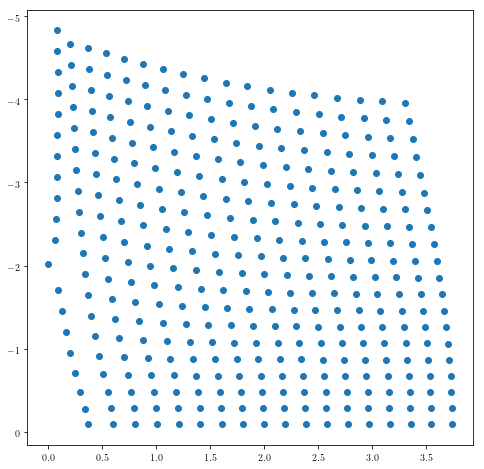

In [39]:
oms = [ my_dict[(s,l,n)][0] for (s,l,n) in my_dict.keys() if (s==-2)  ]
plt.figure(figsize=(8,8))
plt.scatter(np.real(oms),np.imag(oms))
plt.gca().invert_yaxis()
plt.show()

In [40]:
print(my_dict[(-2,2,8)])

((3.870659847869805e-10-2.0135205580891924j), 0.002181314657764067, 5999)


In [44]:
[my_dict[(-2,2,n)][0] for n in np.arange(0,20)]

[(0.3736716844180418-0.08896231568893515j),
 (0.3467109968790926-0.27391487529119934j),
 (0.30105345461261107-0.47827698322149526j),
 (0.2515049622258513-0.705148202441857j),
 (0.20751457982999358-0.9468448909054135j),
 (0.16929940306986252-1.1956080540906069j),
 (0.13325234019851326-1.4479106262097026j),
 (0.09282233375215646-1.7038411721306006j),
 (3.870659847869805e-10-2.0135205580891924j),
 (0.06326335759487339-2.302644633983424j),
 (0.07655349367110527-2.560826598926406j),
 (0.08259814292538446-2.8154423471638568j),
 (0.08572794732911967-3.068694729401907j),
 (0.08739422640436784-3.321230257102201j),
 (0.08823895836530314-3.573320756665281j),
 (0.08859040300377727-3.825105301051019j),
 (0.08863276180595221-4.076664626865472j),
 (0.08847687505885984-4.328050064046966j),
 (0.08819051455848587-4.5792969741857386j),
 (0.08782009805943558-4.83043023921786j)]

# Testing the Lentz method for continued fractions

In [35]:
import cont_frac

In [36]:
reload(cont_frac)

<module 'cont_frac' from 'cont_frac.pyc'>

In [37]:
def rt2b(n):
    if (n==0):
        return 1
    return 2

def rt2a(n): return 1

cont_frac.Lentz(rt2a, rt2b)

(1.4142135623638004, 4.488287519421874e-11, 14)

In [38]:
phia = rt2a
phib = rt2a

cont_frac.Lentz(phia, phib)

(1.6180339887802424, 6.785971784495359e-11, 25)

In [40]:
def pia(n):
    if (n==1):
        return 4.
    return (n-1.)*(n-1.)
    
def pib(n):
    if (n==0):
        return 0.
    return 2*n-1.

cont_frac.Lentz(pia, pib, tol=1.e-15)

(3.1415926535897922, 8.881784197001252e-16, 21)

In [41]:
def e_a(n):
    if (n==1):
        return 1.
    return (n-1.)
    
def e_b(n):
    if (n==0):
        return 2.
    return n

cont_frac.Lentz(e_a, e_b, tol=1.e-15)

(2.7182818284590464, 3.3306690738754696e-16, 16)

In [42]:
def cot1_a(n):
    return -1.
    
def cot1_b(n):
    return 2.*n+1.

print(1./np.tan(1.))
cont_frac.Lentz(cot1_a, cot1_b, tol=1.e-15)

0.6420926159343308


(0.6420926159343306, 1.1102230246251565e-16, 9)

In [21]:
ells = np.arange(2,8)
(ells-1.)*ells*(ells+1.)*(ells+2.)/12.

array([  2.,  10.,  30.,  70., 140., 252.])